### 1. 算法概述
#### 1.1 算法特点
简单地说，k-近邻算法采用测量不同特征值之间的距离方法进行分类。

* 优点 ：**精度高、对异常值不敏感、无数据输入假定，实现简单**
* 缺点 ：**时间复杂度和空间复杂度都比较高，预测过程需要对训练数据集中的每个样本进行计算**

适用数据范围：数值型和标称型

#### 1.2 工作原理
存在一个训练样本集，并且每个样本都存在标签（有监督学习）。输入没有标签的新样本数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取出与样本集中特征最相似的数据（最近邻）的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，而且k通常不大于20。最后选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

### 2. 海伦约会问题
海伦有一个记事本，里面记录着她之前的约会信息。记载着每个约会对象的 **每周冰淇淋消耗（公升）** ， **玩游戏占生活时间的比重**， **每年飞行公里**， 三个信息。当然海伦还记录了她对记事本中每个对象的好感程度，她自己将他们分成三个等级，1. 不喜欢， 2. 一般般， 3. 非常喜欢。
每个约会的对象我们就称之为一个样本，每个样本就是这个样子：
```
40920	8.326976	0.953952	largeDoses
```

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## 读入海伦的记事本
dating_data = []
labels_map = {'didntLike':0, 'smallDoses':1, 'largeDoses':2}
with open('datingTestSet.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()  #
        list_str = line.split('\t')
        list_str[0] = float(list_str[0])
        list_str[1] = float(list_str[1])
        list_str[2] = float(list_str[2])
        list_str[3] = labels_map[list_str[3]]
        dating_data.append(list_str)
sample_data = np.array(dating_data)

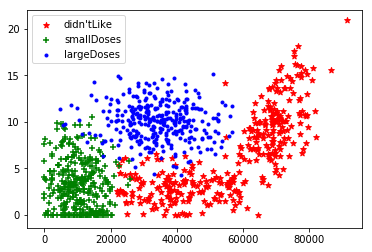

In [22]:
plt.clf()
l1 = plt.scatter(sample_data[sample_data[:,-1] == 0, 0], 
                 sample_data[sample_data[:,-1] == 0, 1], 
                 marker='*', color='r')
l2 = plt.scatter(sample_data[sample_data[:,-1] == 1, 0], 
                 sample_data[sample_data[:,-1] == 1, 1], 
                 marker='+', color='g')
l3 = plt.scatter(sample_data[sample_data[:,-1] == 2, 0], 
                 sample_data[sample_data[:,-1] == 2, 1], 
                 marker='.', color='b')
plt.legend([l1,l2,l3], ["didn'tLike", "smallDoses", "largeDoses"])

In [23]:
# 实现KNN算法
# 对于新的数据（海伦的约会对象），假设数据是：[40910    6.326976    0.553952]
from math import sqrt
X_train = sample_data[:,:-1]
y_train = sample_data[:,-1]

X_test = [[40910, 6.326976, 0.553952]]
K = 6
# 计算距离
distances = []
for x_train in X_train:
    d = sqrt(np.sum((X_test[0] - x_train)**2))
    distances.append(d)

In [24]:
# 对距离进行排序
neareast = np.argsort(distances)
topK_y = [y_train[i] for i in neareast[:K]]  # 取出最近的K个元素
from collections import Counter
votes = Counter(topK_y)
y_pred = votes.most_common(1)[0][0]

In [25]:
# 使用sklearn中封装好的算法

X = sample_data[:,:-1]
y = sample_data[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.84

In [26]:
from sklearn.svm import svm
help svm

SyntaxError: invalid syntax (<ipython-input-26-9cc51ea2e67a>, line 2)